In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Import Dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_prep_new.csv")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Gender Female,Gender Male,Not a SeniorCitizen,Is SeniorCitizen,Not Have Partner,Have Partner,Not Have Dependets,Have Dependents,Not Have PhoneService,Have PhoneService,Not Have MultipleLines,Not have phone service,Have MultipleLines,Using DSL as InternetService,Using Fiber optic as InternetService,Not have InternetService,Not Have OnlineSecurity,Not have internet service(OnlineSecurity),Have OnlineSecurity,Not Have OnlineBackup,Not have internet service(OnlineBackup),Have OnlineBackup,Not Have DeviceProtection,Not Have internet service(DeviceProtection),Have DeviceProtection,Not have TechSupport,Not Have internet service(TechSupport),Have TechSupport,Not have StreamingTV,Not Have internet service(StreamingTV),Have StreamingTV,Not have StreamingMovies,Not Have internet service(StreamingMovies),Have StreamingMovies,Month-to-month,One year,Two year,Not Using PaperlessBilling,Using PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,No,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,No,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,Yes,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0.512486,-0.747850,-0.195248,No,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,-1.239504,0.196178,-0.940457,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,-0.343137,0.664868,-0.129180,No,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7028,2234-XADUH,1.612573,1.276493,2.241056,No,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7029,4801-JZAZL,-0.872808,-1.170004,-0.854514,No,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7030,8361-LTMKD,-1.158016,0.319168,-0.872095,Yes,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


# Feature selection

Kita akan menggunakan filter-based Approach method yaitu mutual information

In [7]:
df.drop(columns=["customerID"],inplace=True)

In [8]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [10]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [11]:
mi = SelectKBest(mutual_info_classif, k="all")

In [12]:
mi.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7fe15c2508b0>)

In [13]:
feature_mi_score = pd.Series(mi.scores_, index=X.columns)

In [14]:
feature_mi_score.sort_values(ascending=False)

Month-to-month                                 0.097808
Two year                                       0.068206
Not Have OnlineSecurity                        0.064799
tenure                                         0.064211
Not have TechSupport                           0.061312
Electronic check                               0.043204
TotalCharges                                   0.042070
MonthlyCharges                                 0.041580
Using Fiber optic as InternetService           0.040341
Not Have internet service(StreamingMovies)     0.037019
Not have InternetService                       0.034434
Not Have internet service(StreamingTV)         0.034280
Not have internet service(OnlineSecurity)      0.033055
Not Have OnlineBackup                          0.031221
Not Have internet service(DeviceProtection)    0.030196
Not Have internet service(TechSupport)         0.025630
Not have internet service(OnlineBackup)        0.024613
Not Have DeviceProtection                      0

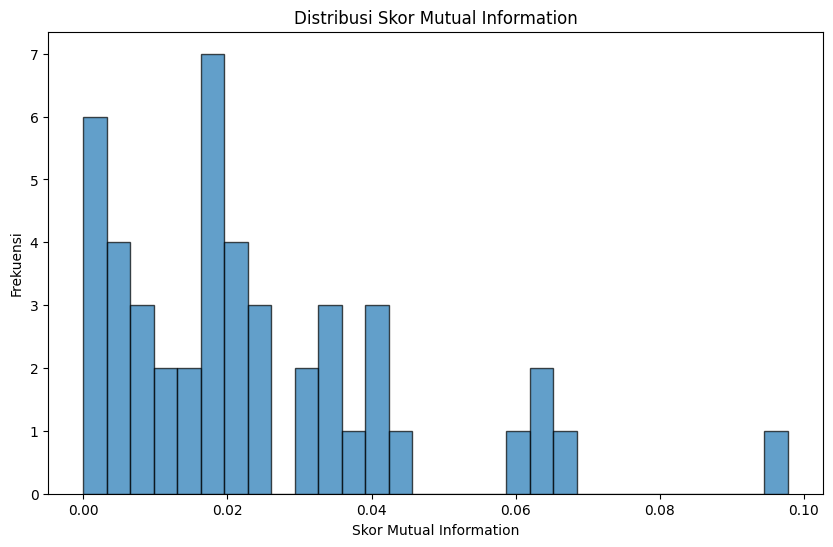

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(feature_mi_score, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribusi Skor Mutual Information')
plt.xlabel('Skor Mutual Information')
plt.ylabel('Frekuensi')
plt.show()

kita akan mengambil feature yang memiliki nilai MI diatas 0.04

In [23]:
threshold = 0.04

In [24]:
selected_features = feature_mi_score[feature_mi_score > threshold]

In [25]:
selected_features

tenure                                  0.064211
MonthlyCharges                          0.041580
TotalCharges                            0.042070
Using Fiber optic as InternetService    0.040341
Not Have OnlineSecurity                 0.064799
Not have TechSupport                    0.061312
Month-to-month                          0.097808
Two year                                0.068206
Electronic check                        0.043204
dtype: float64

In [26]:
selected_features.shape

(9,)

In [27]:
selected_features_df = df[selected_features.index]

In [28]:
selected_features_df

,tenure,MonthlyCharges,TotalCharges,Using Fiber optic as InternetService,Not Have OnlineSecurity,Not have TechSupport,Month-to-month,Two year,Electronic check
0,-1.280248,-1.161694,-0.994194,0,1,1,1,0,1
1,0.064303,-0.260878,-0.173740,0,0,1,0,0,0
2,-1.239504,-0.363923,-0.959649,0,0,1,1,0,0
3,0.512486,-0.747850,-0.195248,0,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,0,0,0,0,0
7028,1.612573,1.276493,2.241056,1,1,1,0,0,0
7029,-0.872808,-1.170004,-0.854514,0,0,1,1,0,1
7030,-1.158016,0.319168,-0.872095,1,1,1,1,0,0


# Feature extraction

PCA tidak optimal untuk klasifikasi

LDA lebih cocok untuk klasifikasi, dalam kasus ini churn, tapi syaratnya data perlu asumsi normalitas dan homogenitas varians antara kelas.

untuk awalan kita tidak akan melakuakn Feature extraction terlebih dahulu.

In [29]:
from scipy.stats import shapiro
import statsmodels.api as sm

In [31]:
for kolom in selected_features_df.columns:
    statistic, p_value = shapiro(selected_features_df[kolom])
    print(f"Kolom {kolom}: Statistik={statistic:.3f}, p-value={p_value:.3f}")
    if p_value > 0.05:
        print("Data kemungkinan berdistribusi normal\n")
    else:
        print("Data kemungkinan tidak berdistribusi normal\n")

Kolom tenure: Statistik=0.904, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom MonthlyCharges: Statistik=0.921, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom TotalCharges: Statistik=0.860, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom Using Fiber optic as InternetService: Statistik=0.631, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom Not Have OnlineSecurity: Statistik=0.637, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom Not have TechSupport: Statistik=0.637, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom Month-to-month: Statistik=0.633, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom Two year: Statistik=0.529, p-value=0.000
Data kemungkinan tidak berdistribusi normal

Kolom Electronic check: Statistik=0.596, p-value=0.000
Data kemungkinan tidak berdistribusi normal



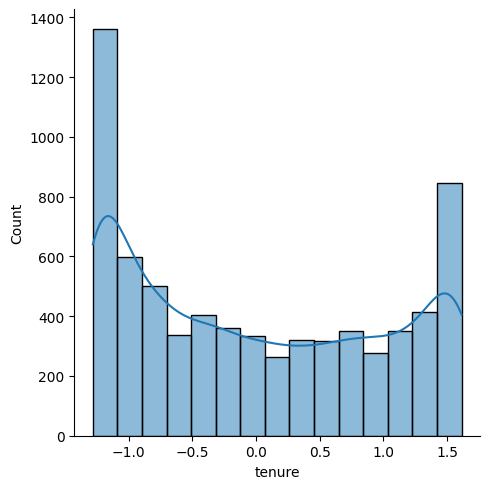

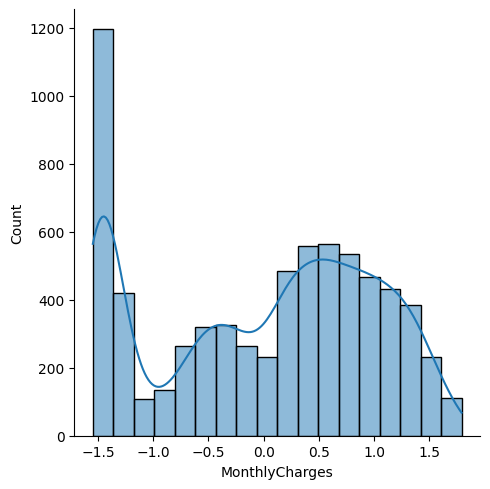

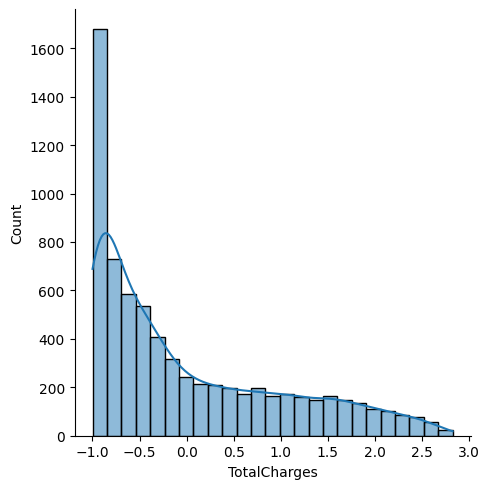

In [33]:
Numerikal = selected_features_df[['tenure', 'MonthlyCharges', 'TotalCharges']]

for i in Numerikal.columns:
  sns.displot(df, x=i, kde=True, height=5)
  plt.show()

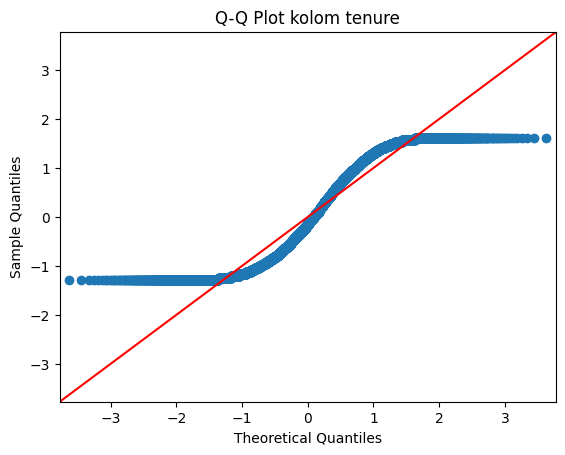

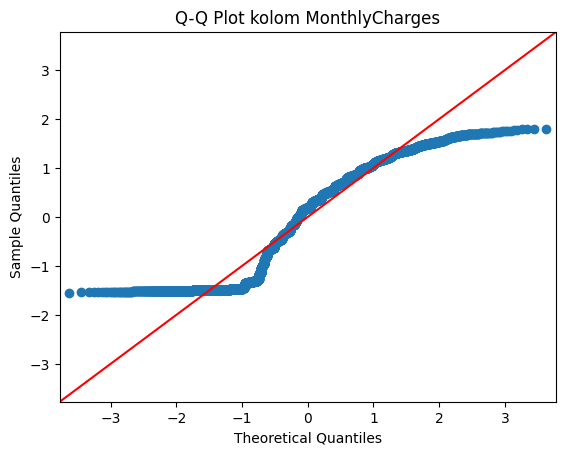

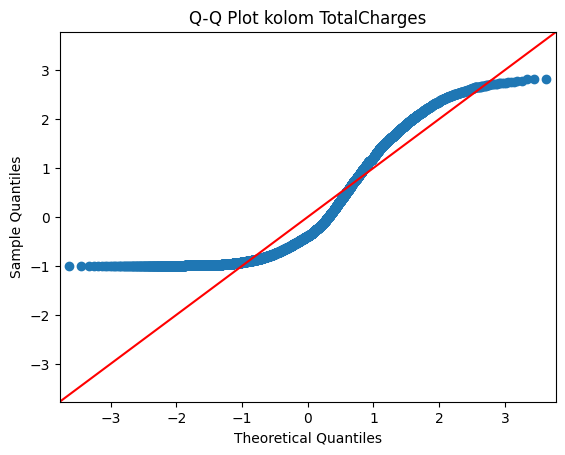

In [34]:
for i in Numerikal.columns:
  sm.qqplot(df[i], line ='45')
  plt.title(f"Q-Q Plot kolom {i}")
  plt.show()

nampak bahwa asumsi normalitas tidak terpenuhi di data saya

tapi karena saya menggunakan Random Forest sebagai model klasifikasi utama, saya tidak perlu menggunakan LDA untuk feature extraction. Random Forest bekerja dengan baik dengan data kategorikal biner tanpa memerlukan asumsi normalitas atau homogenitas varians.

 Salah satu keuntungan menggunakan Random Forest adalah bahwa algoritma ini tidak memerlukan langkah-langkah feature extraction yang rumit. Random Forest dapat bekerja langsung dengan fitur-fitur asli dalam data yang ada, baik itu numerik atau kategorikal.

 Kesimpulannya, dengan Random Forest, saya tidak perlu melakukan feature extraction yang rumit seperti yang mungkin diperlukan dengan LDA atau PCA. saya dapat menggunakan fitur asli dalam data saya.

# Modeling

## Baseline model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state=42)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = selected_features_df
y = df["Churn"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = rf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.767590618336887
Precision: 0.5802047781569966
Recall: 0.45454545454545453
F1-score: 0.5097451274362819
Confusion matriks: 
 [[910 123]
 [204 170]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.58      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407



In [44]:
from sklearn.metrics import roc_curve, auc

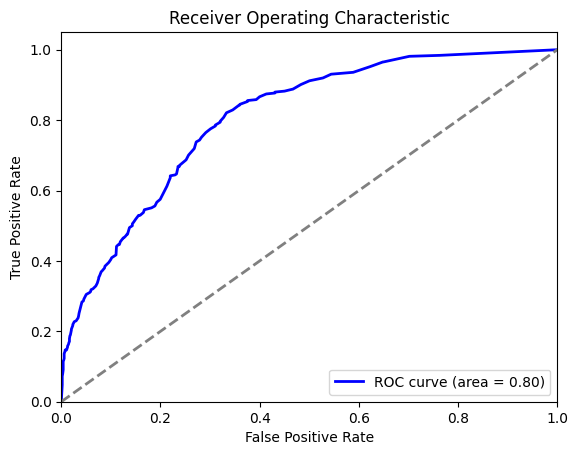

In [45]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.model_selection import learning_curve, StratifiedKFold

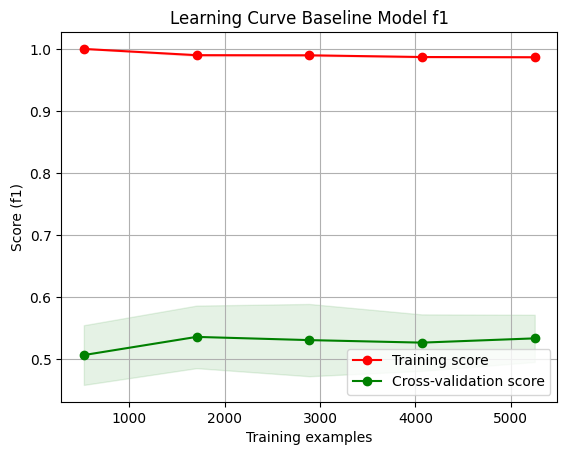

In [47]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

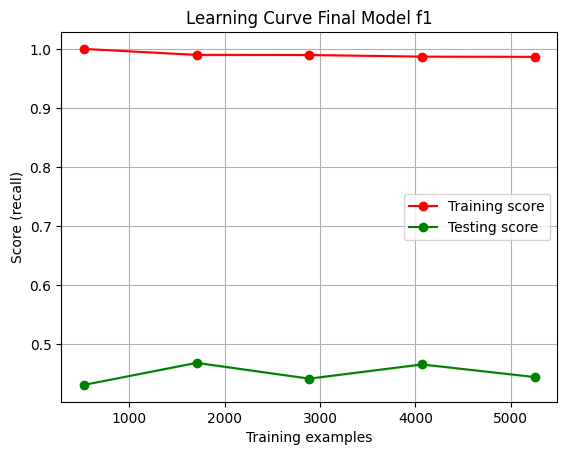

In [48]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [49]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.5022692889561271
f1 train: 0.959541469993257


baseline model mengalami overfiting, dengan kata lain, kita harus mencari tunning terbaik dengan skor terbaik tanpa adanya resiko overfiting ataupun underfiting.

## Model Performance Curves

### max_depth

In [50]:
from sklearn.model_selection import cross_val_score

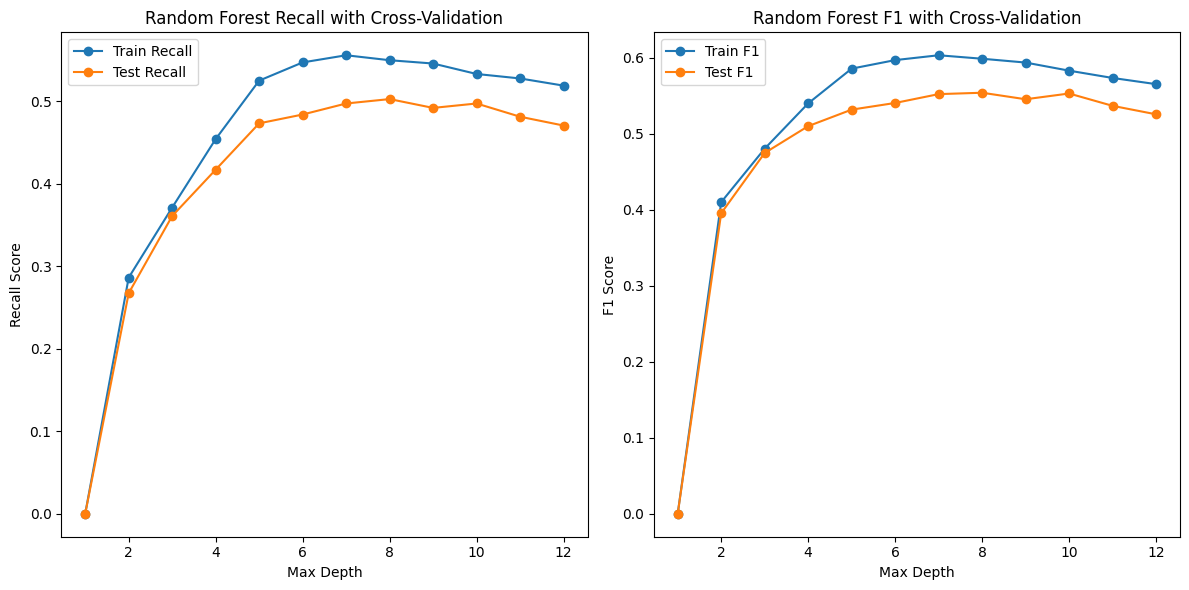

In [51]:
values = [i for i in range(1, 13)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(max_depth=i, random_state=42, n_jobs=-1)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("Max Depth")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

### min_samples_split

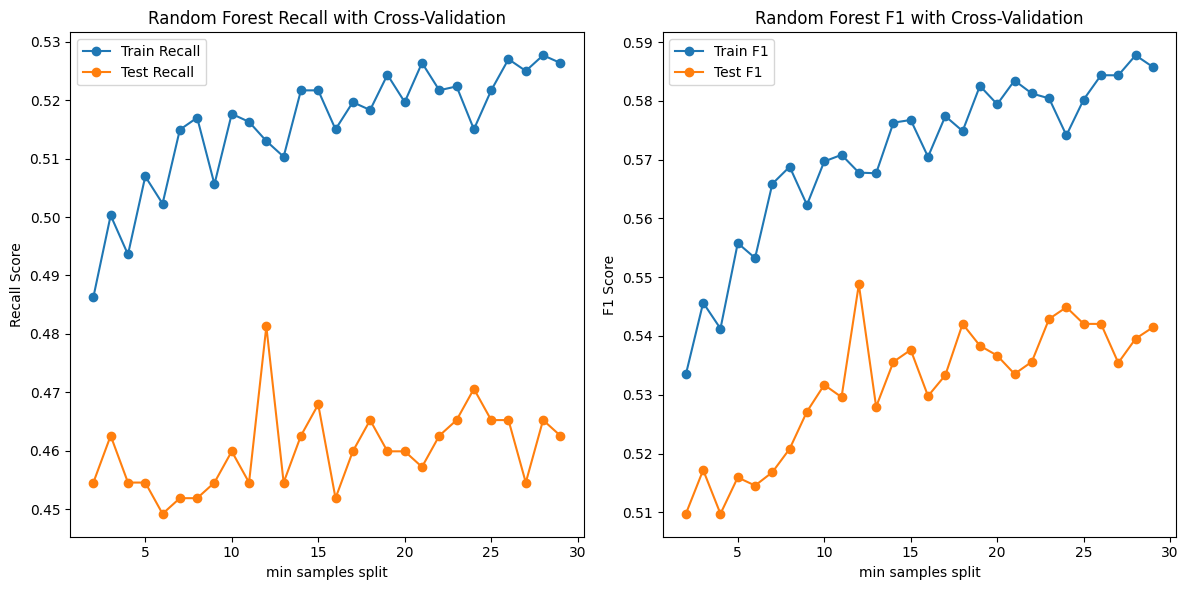

In [52]:
values = [i for i in range(2, 30)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_split=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples split")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples split")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

### min_samples_leaf

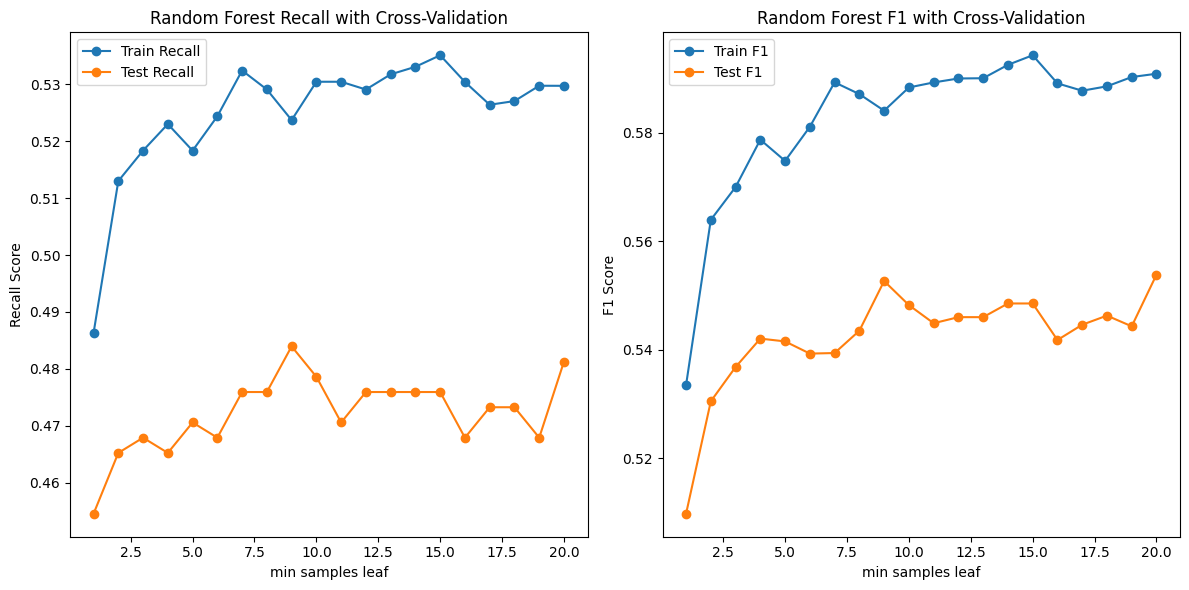

In [53]:
values = [i for i in range(1, 21)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples leaf")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples leaf")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

## Hyperparameter tunning

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4,5,6,7],
    'min_samples_split': [12],
    'min_samples_leaf': [9],
    'bootstrap': [True, False]
}

In [56]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.2 MB/s eta 0:00:00


In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
rf = RandomForestClassifier(random_state=42)

In [66]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1)

In [67]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [9],
                                        'min_samples_split': [12],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='f1')

In [62]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 700, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 6, 'bootstrap': False}


## Evaluasi model hyperparameter tunning

In [68]:
rf = RandomForestClassifier(
    bootstrap = False,
    random_state=42,
    max_depth = 6,
    max_features = "log2",
    min_samples_leaf = 8,
    min_samples_split = 12,
    n_estimators = 700)

In [69]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=6, max_features='log2',
                       min_samples_leaf=8, min_samples_split=12,
                       n_estimators=700, random_state=42)

In [70]:
y_pred = rf.predict(X_test)

In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7867803837953091
Precision: 0.6209150326797386
Recall: 0.5080213903743316
F1-score: 0.5588235294117647
Confusion matriks: 
 [[917 116]
 [184 190]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



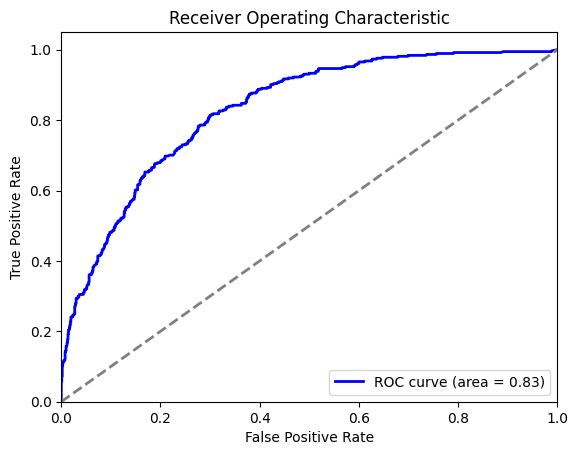

In [72]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

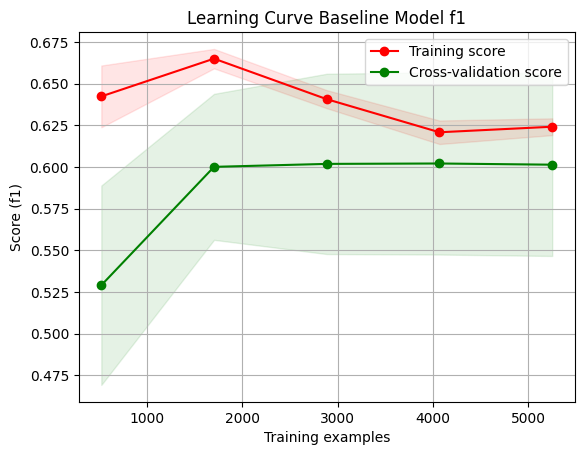

In [73]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

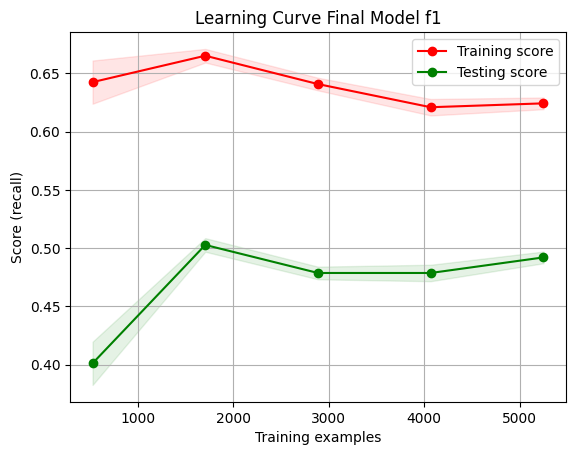

In [74]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [75]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.5459940652818992
f1 train: 0.6234612599565532


selisihnya sekitar 0.08 atau 8% antara F1-score pada data latih dan data uji menunjukkan bahwa model memiliki performa yang sedikit lebih baik pada data latih dibandingkan pada data uji. Namun, selisih ini masih dalam rentang yang bisa dianggap normal dan tidak menunjukkan overfitting yang parah.

mari cari skorr dengan nilai yang lebih tinggi